## **Excercise2**
### **Hanwriting Recognition**

n the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:

It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
If you add any additional variables, make sure you use the same names as the ones used in the class

In [ ]:
#import the libraries
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
#Download data
mnist=tf.keras.datasets.mnist
(train_img,train_label),(test_img,test_label)=mnist.load_data()

In [ ]:
#Normalize the data
train_img=train_img/255.0
test_img=test_img/255.0


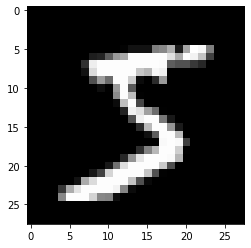

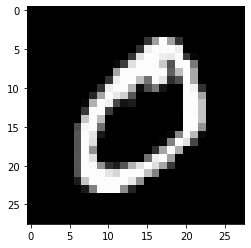

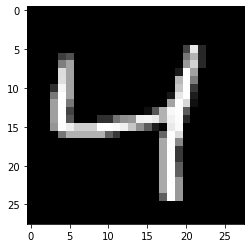

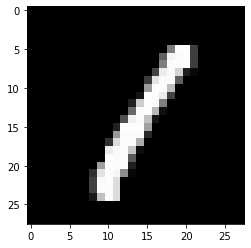

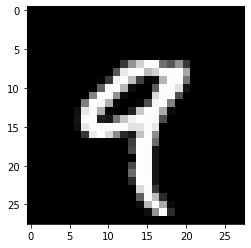

In [ ]:
#Display the images
import numpy as np
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(train_img[i],cmap='gray')
    plt.show()

In [ ]:
print(train_label[0])
print(train_img[0])

5
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

In [ ]:
#Construct the model
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                  
])


In [ ]:
#Define callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.99):
      print("Reached 99% accuracy so cancelling training!")
      self.model.stop_training=True

In [ ]:
callback=myCallback()

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer = optimizers.Adam(),loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_img,train_label,epochs=50,callbacks=[callback])

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0547 - accuracy: 0.9830
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0349 - accuracy: 0.9889
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0270 - accuracy: 0.9913


In [ ]:
print(history.epoch, history.history['accuracy'][-1])


[0, 1, 2] 0.9912833571434021


In [ ]:
model.evaluate(test_img,test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9791


[0.07035167515277863, 0.9790999889373779]